In [1]:
import pandas as pd
dataset = pd.read_csv('caravan-insurance-challenge.csv')


# print(dataset.info())

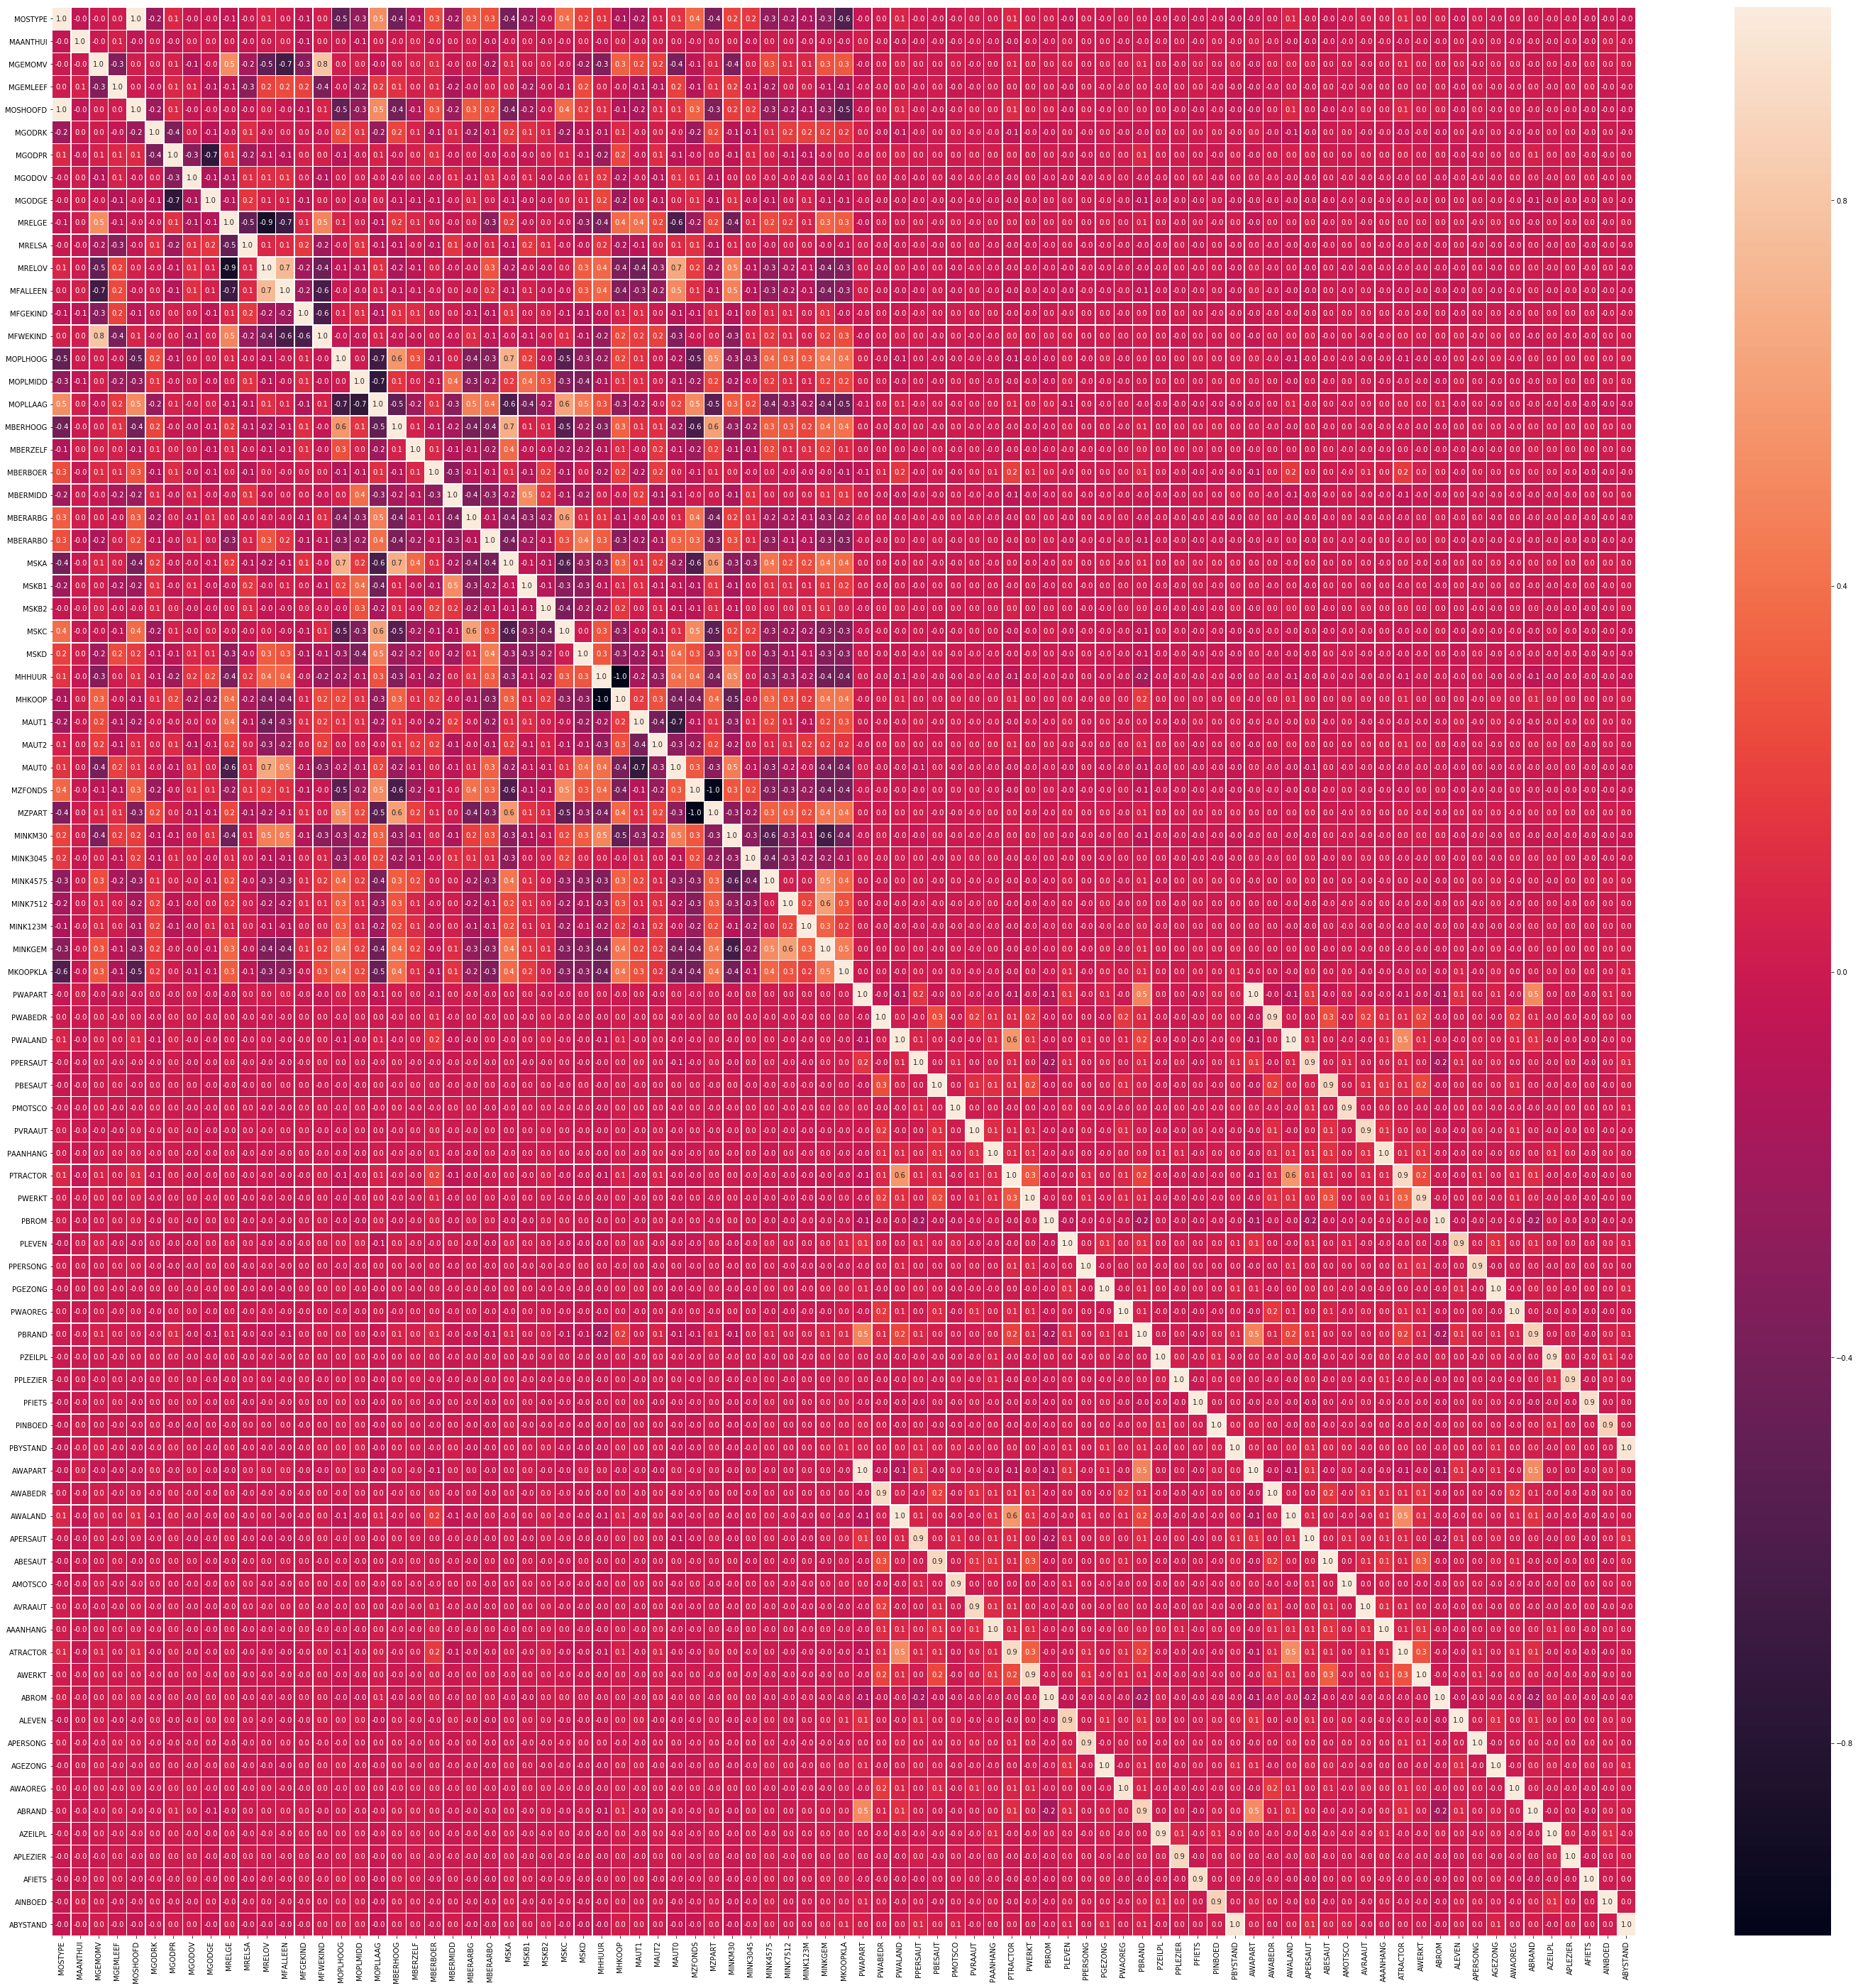

In [3]:
# dataset.iloc[:,1:-1].corr()
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
#correlation map
f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(dataset.iloc[:,1:-1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [5]:
data = dataset.drop(["MOSHOOFD","MGODGE","MRELOV","MFALLEEN","MFWEKIND","MOPLHOOG","MOPLMIDD","MBERHOOG","MHKOOP","MAUT1","MZFONDS","AWAPART","AWABEDR","AWALAND","APERSAUT","ABESAUT","AMOTSCO","AVRAAUT","AAANHANG","ATRACTOR","AWERKT","ABROM","ALEVEN","APERSONG","AGEZONG","AWAOREG","ABRAND","AZEILPL","APLEZIER","AFIETS","AINBOED","ABYSTAND"], axis=1)
data.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MRELGE,MRELSA,...,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,CARAVAN
0,train,33,1,3,2,0,5,1,7,0,...,0,0,0,5,0,0,0,0,0,0
1,train,37,1,2,2,1,4,1,6,2,...,0,0,0,2,0,0,0,0,0,0
2,train,37,1,2,2,0,4,2,3,2,...,0,0,0,2,0,0,0,0,0,0
3,train,9,1,3,3,2,3,2,5,2,...,0,0,0,2,0,0,0,0,0,0
4,train,40,1,4,2,1,4,1,7,1,...,0,0,0,6,0,0,0,0,0,0


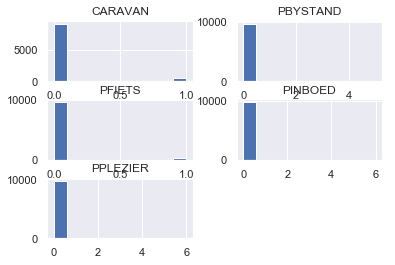

In [52]:
# data.iloc[:, 50:].hist()

# import seaborn as sns
# import matplotlib.pyplot as plt
# from pandas.plotting import scatter_matrix
# sns.set(color_codes=True)
# # dataset.plot(kind='density', subplots=True, sharex=True)
# # plt.show()
# # scatter_matrix(data.iloc[:, :10])
# plt.show()

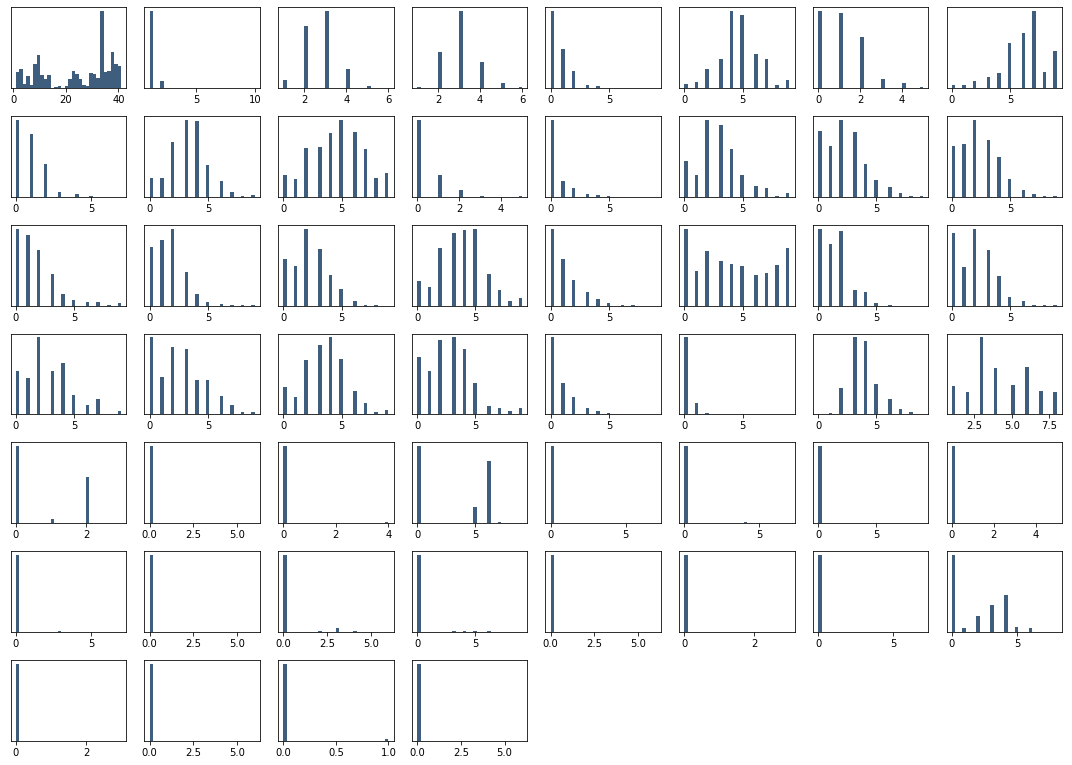

In [6]:
import numpy as np
fig = plt.figure(figsize=(15, 12))

# loop over all vars (total: 34)
for i in range(1, data.iloc[:,1:-1].shape[1]):
    plt.subplot(8, 8, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)

    vals = np.size(data.iloc[:, i].unique())
    if vals < 10:
        bins = vals
    else:
        vals = 10

    plt.hist(data.iloc[:, i], bins=30, color='#3F5D7D')

plt.tight_layout()

# plt.savefig("histogram-distribution.png")

In [7]:
data = data.drop(["PBESAUT","PVRAAUT","PWABEDR","PWALAND","PAANHANG","PGEZONG","PPERSONG","PWAOREG","PWERKT","PZEILPL","PBYSTAND","PINBOED","PPLEZIER"], axis=1)

X_value = data.iloc[:,1:-1].values
Y_value = data.iloc [:,-1].values
data.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MRELGE,MRELSA,...,MKOOPKLA,PWAPART,PPERSAUT,PMOTSCO,PTRACTOR,PBROM,PLEVEN,PBRAND,PFIETS,CARAVAN
0,train,33,1,3,2,0,5,1,7,0,...,3,0,6,0,0,0,0,5,0,0
1,train,37,1,2,2,1,4,1,6,2,...,4,2,0,0,0,0,0,2,0,0
2,train,37,1,2,2,0,4,2,3,2,...,4,2,6,0,0,0,0,2,0,0
3,train,9,1,3,3,2,3,2,5,2,...,4,0,6,0,0,0,0,2,0,0
4,train,40,1,4,2,1,4,1,7,1,...,3,0,0,0,0,0,0,6,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train_original, X_test, y_train_original, y_test = train_test_split(X_value, Y_value, test_size=0.3,
                                                                        random_state=42)

print('Training Set Shape:   ', X_train_original.shape, y_train_original.shape)

# X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0.33,random_state=42)
# Used Seed in Partitioning so that Test Set remains same for every Run

# print('Validation Set Shape: ', X_val.shape,y_val.shape)
print('Test Set Shape:       ', X_test.shape, y_test.shape)

      

# # Imbalanced data Over sampling using SMOTE
# doOversampling = True

# if doOversampling:
# # Apply regular SMOTE
#     sm = SMOTE(kind='regular')
#     X_train, y_train = sm.fit_sample(X_train_original, y_train_original)
#     print('Training Set Shape after oversampling:   ', X_train.shape, y_train.shape)
#     print(pd.crosstab(y_train,y_train))
# else:
#     X_train = X_train_original
#     y_train = y_train_original

Training Set Shape:    (6875, 40) (6875,)
Test Set Shape:        (2947, 40) (2947,)


In [17]:
# Feature Scaling
sc = StandardScaler()  
X_train_scaled = sc.fit_transform(X_train_original)
X_test_scaled = sc.transform(X_test)

# Normalizing continuous variables

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0,1))

# scaler.fit(X_train_original)
# X_train_scaled = scaler.transform(X_train_original)
# X_test_scaled = scaler.transform(X_test)

C:\Users\saura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saura\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,class_weight="balanced")
classifier.fit(X_train_scaled,y_train_original)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_predict = classifier.predict(X_test_scaled)
y_predict

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

Accuracy using Logistic regression: 0.6521886664404479
Confusion matrix 
 [[1804  961]
 [  64  118]]
             precision    recall  f1-score   support

          0       0.97      0.65      0.78      2765
          1       0.11      0.65      0.19       182

avg / total       0.91      0.65      0.74      2947



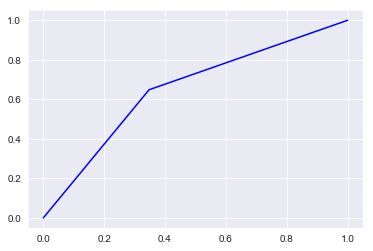

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
print("Accuracy using Logistic regression:",accuracy_score(y_test, y_predict))
print("Confusion matrix \n",confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
fpr, tpr, thresholds= metrics.roc_curve(y_test,y_predict)
auc = metrics.roc_auc_score(y_test,y_predict, average='macro', sample_weight=None)
sns.set_style('darkgrid')
sns.lineplot(fpr,tpr,color ='blue')
plt.show()

In [20]:
# applying Decision Tree and Random forest method
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']
criterion=['entropy','gini']
bootstrap = [True,False]
# max depth
max_depth = [int(x) for x in np.linspace(2, 50, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'criterion': criterion,
 'bootstrap': bootstrap 
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train_scaled,y_train_original)
# print results
print(rfc_random.best_params_)

C:\Users\saura\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


{'n_estimators': 51, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini', 'bootstrap': True}


Accuracy Random Forest: 0.7977604343400068
Confusion matrix 
 [[2262  503]
 [  93   89]]
             precision    recall  f1-score   support

          0       0.96      0.82      0.88      2765
          1       0.15      0.49      0.23       182

avg / total       0.91      0.80      0.84      2947



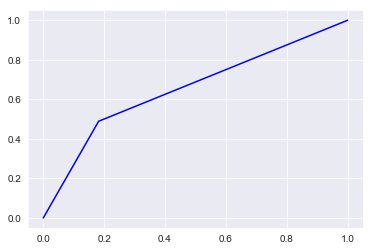

In [22]:
# using random Forest
Forestclassifier = RandomForestClassifier(class_weight="balanced", n_estimators= 51, criterion="gini", bootstrap = True, max_depth=6, max_features = 'auto')
Forestclassifier.fit(X_train_scaled,y_train_original)
y_predict = Forestclassifier.predict(X_test_scaled)

print("Accuracy Random Forest:",accuracy_score(y_test, y_predict))
print("Confusion matrix \n",confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
fpr, tpr, thresholds= metrics.roc_curve(y_test,y_predict)
auc = metrics.roc_auc_score(y_test,y_predict, average='macro', sample_weight=None)
sns.set_style('darkgrid')
sns.lineplot(fpr,tpr,color ='blue')
plt.show()
